# [[데이콘] 전복 나이 예측 경진대회](https://dacon.io/competitions/official/235877/overview/description)

- id : 샘플 아이디
- Gender : 전복 성별(I: Infant(유충))
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole : Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게
- Target : 전복 나이

## 1. Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 평가 산식: nmae score
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

## 2. Data loading

In [65]:
train = pd.read_csv('data/전복 나이 예측 경진대회/train.csv')
test = pd.read_csv('data/전복 나이 예측 경진대회/test.csv')
submission = pd.read_csv('data/전복 나이 예측 경진대회/sample_submission.csv')

In [3]:
train.head(3)

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.291,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.080,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.254,0.4100,18


In [4]:
test.head(3)

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305


In [5]:
submission.head(3)

,id,Target
0,1,0
1,2,0
2,3,0


## 3. Preprocessing
### 1) 데이터 정보 확인

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1253 non-null   int64  
 1   Gender          1253 non-null   object 
 2   Lenght          1253 non-null   float64
 3   Diameter        1253 non-null   float64
 4   Height          1253 non-null   float64
 5   Whole Weight    1253 non-null   float64
 6   Shucked Weight  1253 non-null   float64
 7   Viscra Weight   1253 non-null   float64
 8   Shell Weight    1253 non-null   float64
 9   Target          1253 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 98.0+ KB


In [11]:
train.isnull().sum()

id                0
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2924 non-null   int64  
 1   Gender          2924 non-null   object 
 2   Lenght          2924 non-null   float64
 3   Diameter        2924 non-null   float64
 4   Height          2924 non-null   float64
 5   Whole Weight    2924 non-null   float64
 6   Shucked Weight  2924 non-null   float64
 7   Viscra Weight   2924 non-null   float64
 8   Shell Weight    2924 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 205.7+ KB


In [13]:
test.isnull().sum()

id                0
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
dtype: int64

train, test 데이터 모두 결측값 없음

### 2) 기초통계량 확인

In [17]:
train.describe().iloc[:, 1:]

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [6]:
feature_train = train.columns.tolist()[2:]
print(feature_train)

['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target']


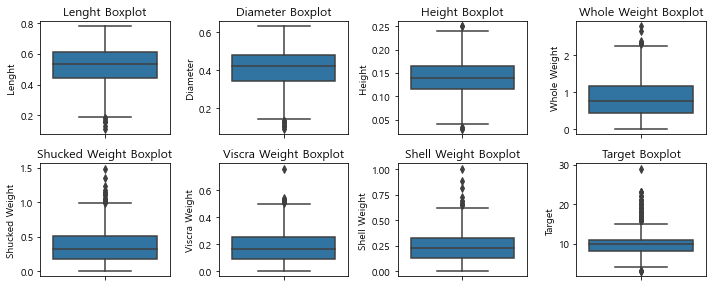

In [7]:
plt.figure(figsize = (10,8))

for i in range(len(feature_train)):
    plt.subplot(4, 4, i+1)
    plt.title(f'{feature_train[i]} Boxplot')
    sns.boxplot(data = train, y = train[feature_train[i]])
plt.tight_layout()
plt.show()

In [8]:
test.describe().iloc[:, 1:]

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
count,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000,2924.000000
mean,0.524473,0.408275,0.139504,0.827689,0.359603,0.180417,0.238297
std,0.120051,0.099026,0.042975,0.486079,0.220856,0.108623,0.137754
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.455000,0.350000,0.115000,0.443375,0.188000,0.093500,0.130000
50%,0.545000,0.425000,0.145000,0.805250,0.340500,0.171500,0.235000
75%,0.615000,0.480000,0.165000,1.151125,0.501625,0.250500,0.325000
max,0.815000,0.650000,1.130000,2.825500,1.351000,0.641500,0.897000


In [9]:
feature_test = test.columns.tolist()[2:]
print(feature_test)

['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscra Weight', 'Shell Weight']


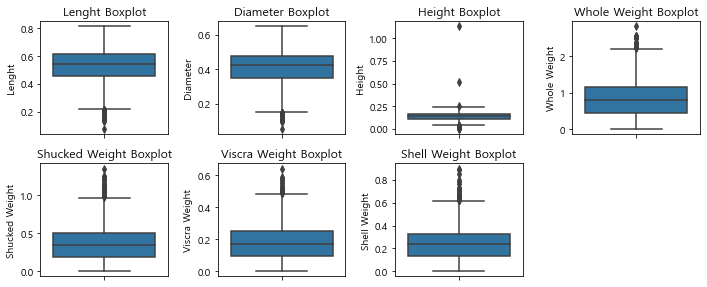

In [10]:
plt.figure(figsize = (10,8))

for i in range(len(feature_test)):
    plt.subplot(4, 4, i+1)
    plt.title(f'{feature_test[i]} Boxplot')
    sns.boxplot(data = test, y = test[feature_test[i]])
plt.tight_layout()
plt.show()

### 3) 각 변수별 분포 확인(히스토그램)

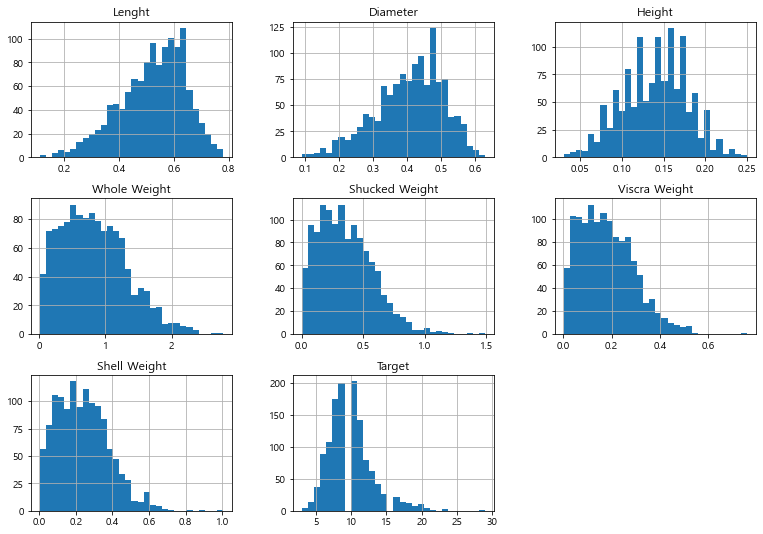

In [11]:
train.iloc[:, 2:].hist(bins = 30, figsize = (13, 9))
plt.show()

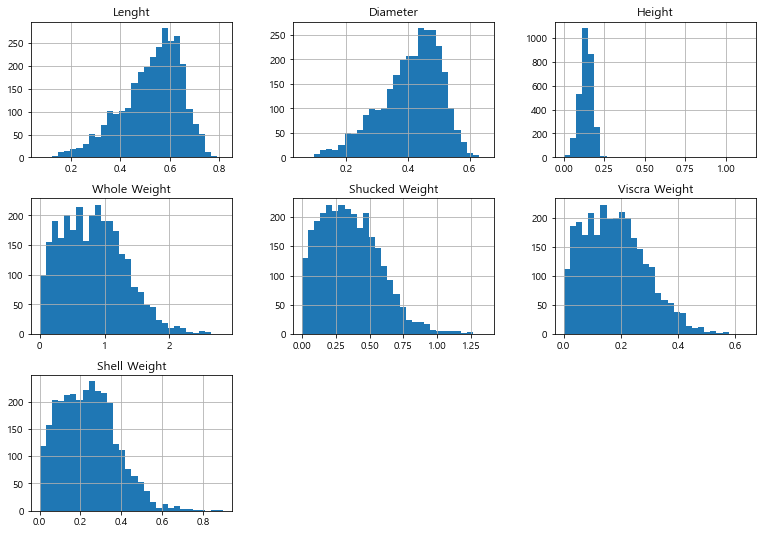

In [12]:
test.iloc[:, 1:].hist(bins = 30, figsize = (13, 9))
plt.show()

### 3) 각 변수별 상관관계

<ipython-input-13-9600ac20c54d>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_df, dtype=np.bool)


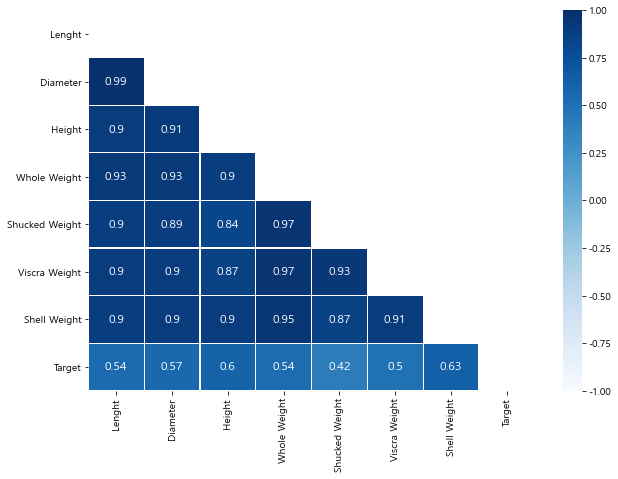

In [13]:
# train 각 변수 간 상관관계 확인(id, Gender 변수 제외)
corr_df = train.iloc[:, 2:].corr(method='pearson')

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 7))
sns.heatmap(data = corr_df, cmap='Blues', mask=mask,
            annot = True, annot_kws={'size' : 12}, linecolor='white', linewidths=.2,
           vmin = -1,vmax = 1 # 컬러바 범위 -1 ~ 1
           )
plt.show()

<ipython-input-14-cdc0d92e8ff2>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_df, dtype=np.bool)


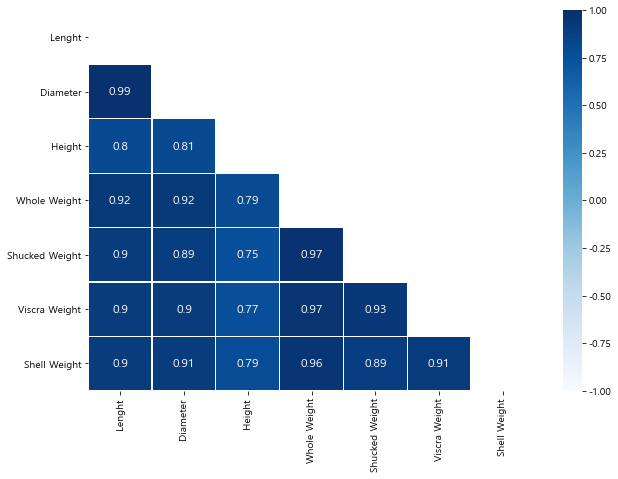

In [14]:
# test 각 변수 간 상관관계 확인(id, Gender 변수 제외)
corr_df = test.iloc[:, 1:].corr(method='pearson')

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 7))
sns.heatmap(data = corr_df, cmap='Blues', mask=mask,
            annot = True, annot_kws={'size' : 12}, linecolor='white', linewidths=.2,
           vmin = -1,vmax = 1 # 컬러바 범위 -1 ~ 1
           )
plt.show()

### 4) Feature ~ target 관계
#### (1) Gender

In [15]:
train_gender_df = train[['Gender', 'Target']]
train_gender_df.head(3)

,Gender,Target
0,M,15
1,I,8
2,I,18


In [16]:
train_gender_df = pd.get_dummies(train_gender_df, columns=['Gender'])
train_gender_df.head(3)

,Target,Gender_F,Gender_I,Gender_M
0,15,0,0,1
1,8,0,1,0
2,18,0,1,0


In [17]:
from statsmodels.formula.api import ols

res = ols('Target ~ Gender_F + Gender_M', data = train_gender_df).fit() # 기준 변수: Gender_I
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           5.04e-59
Time:                        23:11:08   Log-Likelihood:                -3106.0
No. Observations:                1253   AIC:                             6218.
Df Residuals:                    1250   BIC:                             6233.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8762      0.144     54.785      0.000       7.594       8.158
Gender_F       3.2106      0.207     15.548      0.000       2.805       3.616
Gender_M       2.8380      0.196     14.469      0.000       2.453       3.223
==============================================================================
Omnibus:                      328.592   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              892.826
Skew:                           1.351   Prob(JB):                    1.33e-194
Kurtosis:                       6.130   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[참고](https://bkshin.tistory.com/entry/DATA-19)

**[회귀 계수 해석]**
- Gender가 암컷일 때, 평균 나이는 11.0868이다.

- Gender가 수컷일 때, 평균 나이는 10.7142이다.

- Gender가 유충일 때, 평균 나이는 7.8762이다.

**[가설 검정]**
- *가설1. Gender F와 I의 평균 나이에 차이가 있다.*
    - p-value값이 0이므로 가설은 통계적으로 유의하다.  
    
- *가설2. Gender M와 I의 평균 나이에 차이가 있다.*
    - p-value값이 0이므로 가설은 통계적으로 유의하다.  
    
- *가설3. F와 M의 평균 나이에 차이가 있다. → 신뢰구간 확인*
    - 신뢰구간이 겹치므로 가설은 통계적으로 유의하지 않다.
    
cf. I(baseline)와 F, M을 비교하기 위해서는 p-value를 보면 되고, F, M을 비교하기 위해서는 신뢰 구간을 보면 된다.  
cf. 정리하자면 Baseline과의 차이이에 대한 가설 검정은 p-value로 해야 하고, 가변수끼리의 차이 가설 검정은 신뢰 구간으로 한다.

#### (2) Gender를 제외한 나머지 Feature
[참고](https://mindscale.kr/course/python-visualization-basic/relation/)

In [18]:
feature_train = train.columns.tolist()[2:]
print(feature_train)

['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target']


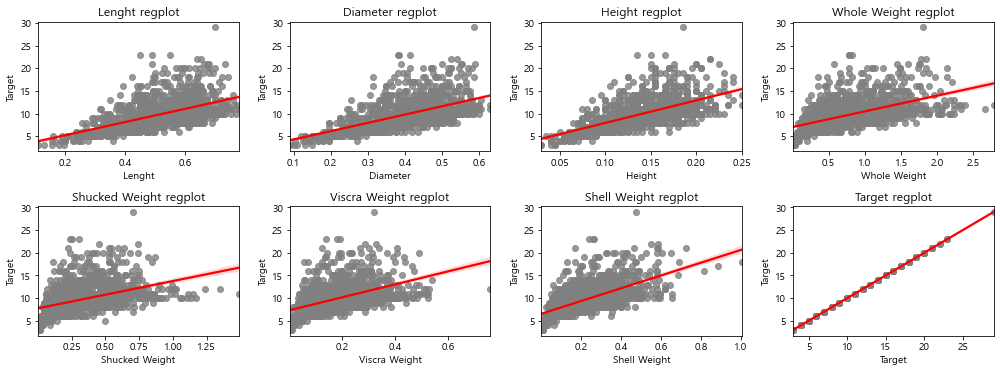

In [19]:
plt.figure(figsize = (14,10))

for i in range(len(feature_train)):
    plt.subplot(4, 4, i+1)
    plt.title(f'{feature_train[i]} regplot')
    sns.regplot(data = train, x = train[feature_train[i]], y = train.Target, line_kws={'color': 'red'}, scatter_kws={'color': 'grey'})
plt.tight_layout()
plt.show()

## 4. Modeling

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### 1) Data split

In [77]:
X_train = train.iloc[:, 1:-1]
X_train.head(3)

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,M,0.605,0.470,0.115,1.1140,0.3925,0.291,0.3100
1,I,0.430,0.315,0.095,0.3780,0.1750,0.080,0.1045
2,I,0.580,0.490,0.195,1.3165,0.5305,0.254,0.4100


In [78]:
X_train['Gender(encode)'] = X_train['Gender'].replace({'M': 0, 'F': 1, 'I': 2})
X_train = X_train.drop(columns='Gender')
X_train.head(3)

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Gender(encode)
0,0.605,0.470,0.115,1.1140,0.3925,0.291,0.3100,0
1,0.430,0.315,0.095,0.3780,0.1750,0.080,0.1045,2
2,0.580,0.490,0.195,1.3165,0.5305,0.254,0.4100,2


In [79]:
y_train = train['Target']
y_train

0       15
1        8
2       18
3       13
4        6
        ..
1248     4
1249     7
1250     7
1251     6
1252    11
Name: Target, Length: 1253, dtype: int64

In [80]:
X_fit, X_val, y_fit, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

### 2) Model

In [81]:
# 모델 생성
linear_model = LinearRegression()
linear_model.fit(X_fit, y_fit)

# 예측값 도출
y_pred = linear_model.predict(X_val)

# 성능 평가(nmae)
NMAE(y_val, y_pred)

0.17086293376534814

### 3) Scaling

In [82]:
s_scaler = StandardScaler()
m_scaler = MinMaxScaler()

In [83]:
train.columns

Index(['id', 'Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

In [84]:
train_col = ['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscra Weight', 'Shell Weight','Gender(encode)']
train[train_col].head(3)

KeyError: "['Gender(encode)'] not in index"

In [85]:
train_sscale = s_scaler.fit_transform(train[train_col])
df_train = pd.DataFrame(train_sscale, columns=train_col)
df_train.head(3)

KeyError: "['Gender(encode)'] not in index"

In [56]:
X_fit, X_val, y_fit, y_val = train_test_split(df_train, y_train, test_size=0.3, random_state=123)

In [57]:
# 모델 생성
linear_model = LinearRegression()
linear_model.fit(X_fit, y_fit)

# 예측값 도출
y_pred = linear_model.predict(X_val)

# 성능 평가(nmae)
NMAE(y_val, y_pred)

0.17086293376534775